# Introduction

Lancez la cellule suivante pour charger vos données.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows", 5)
reviews = pd.read_csv("../wine-reviews/winemag-data-130k-v2.csv", index_col=0)

reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exercices

# 1.

Quelle est la médiane de la colonne `points` dans le DataFrame `reviews` ?

In [4]:
median_points = reviews.points.median()
median_points

88.0

# 2.

Quels sont les pays représentés dans l'ensemble de données ? (Votre réponse ne doit pas comporter de doublons).

In [7]:
countries = reviews.country.unique()
countries

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

# 3.

À quelle fréquence chaque pays figure-t-il dans l'ensemble de données ? Créez une Series de `reviews_per_country` en faisant correspondre les pays au nombre de critiques de vins de ce pays.

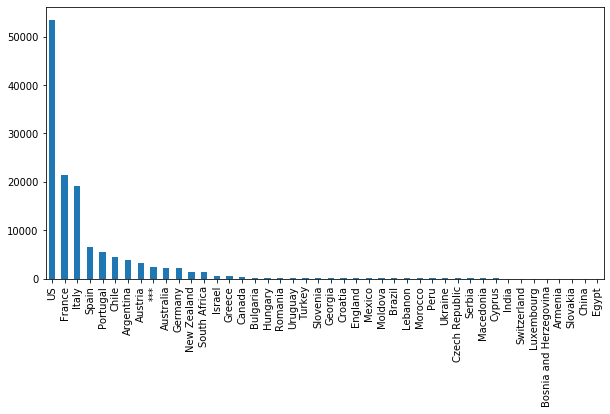

In [132]:
reviews_per_country = reviews.country.value_counts()
plt.figure(figsize =(10, 5))
reviews_per_country.plot.bar()
plt.show()

# 4.

Créez la variable `centered_price` contenant une version de la colonne `price` avec le prix moyen soustrait.

(Remarque : cette transformation de "centrage" est une étape de prétraitement courante avant l'application de divers algorithmes de Machine Learning).

In [25]:
centered_price = reviews.price.dropna() - reviews.price.dropna().mean()
centered_price

1        -20.363389
2        -21.363389
            ...    
129969    -3.363389
129970   -14.363389
Name: price, Length: 120975, dtype: float64

# 5.

Je suis un acheteur de vin. Quel vin est la meilleure affaire ("best bargain") ? Créez une variable `bargain_wine` avec le titre du vin ayant le meilleur rapport qualité/prix dans l'ensemble de données.

In [95]:
#rapport = 
#reviews.points.map(lambda p: p/reviews.price)
reviews.apply(reviews.dropna().points/reviews.dropna().price, axis = 'columns')

SyntaxError: invalid syntax (<ipython-input-95-df8b1aece986>, line 3)

# 6.

Il y a un nombre limité de mots que vous pouvez utiliser pour décrire une bouteille de vin. Un vin est-il plus susceptible d'être "tropical" ("tropical") ou "fruité" ("fruity") ? Créez une Series de `descriptor_counts` en comptant le nombre de fois que chacun de ces deux mots apparaît dans la colonne `description` de l'ensemble de données.

In [103]:
descriptor_counts = pd.Series([reviews.description.map(lambda description : 'tropical' in description.lower().strip('')).sum(), 
                             reviews.description.map(lambda description : 'fruity' in description.lower().strip('')).sum()])
descriptor_counts

0    3747
1    9389
dtype: int64

# 7.

Nous aimerions héberger ces critiques de vins sur notre site web, mais un système de notation allant de 80 à 100 points est trop difficile à comprendre - nous aimerions les traduire en simples notations par étoiles. Un score de 95 ou plus compte pour 3 étoiles, un score d'au moins 85 mais inférieur à 95 compte pour 2 étoiles. Tout autre score est 1 étoile.

Par ailleurs, la Canadian Vintners Association a acheté beaucoup de publicités sur le site, de sorte que tout vin du Canada devrait automatiquement obtenir 3 étoiles, quels que soient les points obtenus.

Créez une série `star_ratings` avec le nombre d'étoiles correspondant à chaque critique dans l'ensemble de données.

In [166]:
def star(rev):
    if rev.country == 'Canada':
        return "***"
    elif (rev.points >= 85 and rev.points < 95) :
        return "**"
    #else:
    #    return "*"

star_ratings = reviews.apply(star, axis = "columns")
star_ratings

TypeError: '>=' not supported between instances of 'str' and 'int'